In [1]:
import pandas as pd
import numpy as np

# Load your data (assuming it's already loaded in your DataFrame named 'data')
data = pd.read_csv('pval_scores_training.csv')
# Convert all columns except 'NAME' and 'disease_ontology_label' to numeric, coercing errors to NaN
for col in data.columns[1:-1]:  # Excluding the last column (disease ontology label)
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Replace zeros with NaN for easier minimum value calculations
data_non_zero = data.replace(0, np.nan)

# Create a new DataFrame to store the results
result = pd.DataFrame(data['NAME'], columns=['NAME'])

# Append the 'disease_ontology_label' to the result DataFrame
result['disease_ontology_label'] = data['disease_ontology_label']

# For each row, find the minimum non-zero value and its corresponding columns
for index, row in data_non_zero.iloc[:, 1:-1].iterrows():  # Exclude 'NAME' and 'disease_ontology_label'
    min_value = row.min()
    columns_with_min_value = row[row == min_value].index
    result.at[index, 'Min_Value'] = min_value
    for i, col_name in enumerate(columns_with_min_value, start=1):
        result.at[index, f'cell_name{i}'] = col_name

# Save the resulting DataFrame to a CSV file
result.to_csv('rows_min_values_columns_and_disease_label.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'pval_scores_training.csv'

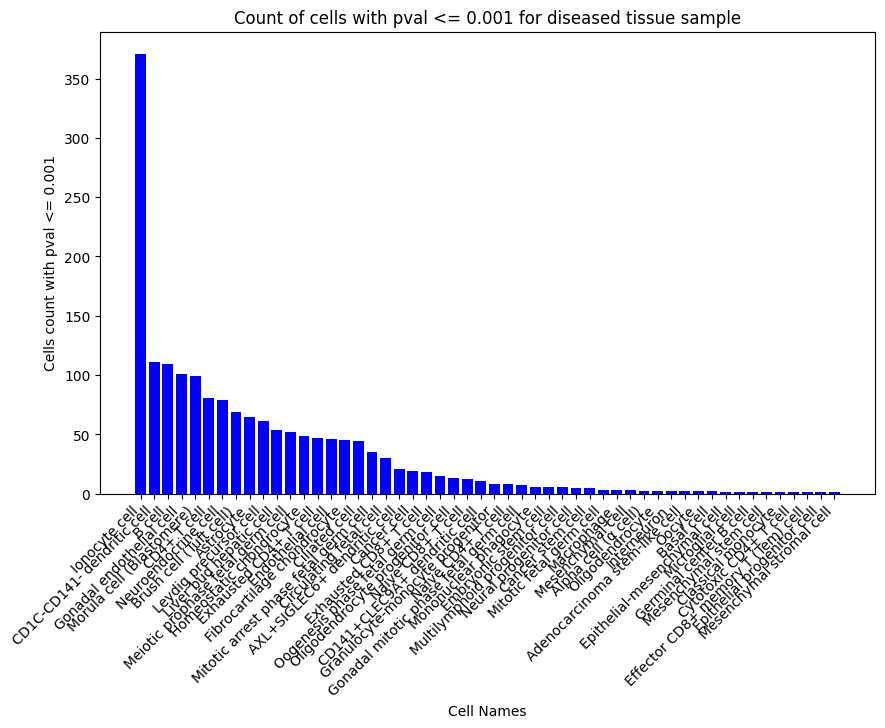

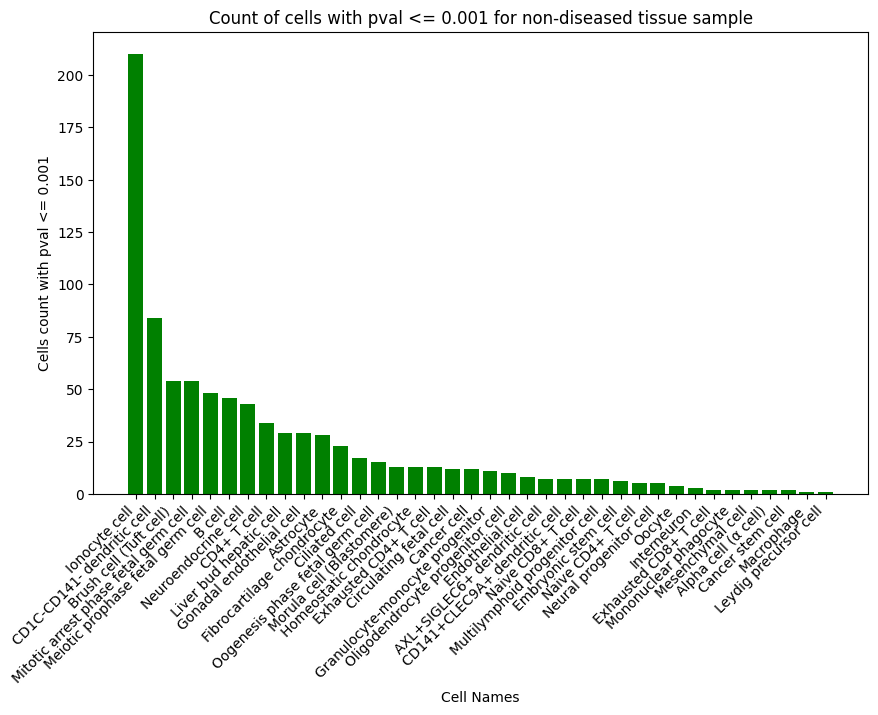

<Figure size 640x480 with 0 Axes>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('cell_anotation.csv')

# Identify columns that contain 'cell_name'
cell_name_columns = [col for col in data.columns if 'cell_name' in col]

# Focus on relevant data: disease labels and cell names
relevant_data = data[['disease_ontology_label'] + cell_name_columns]

# Melt the dataframe to handle cell names in one column
melted_data = relevant_data.melt(id_vars='disease_ontology_label', value_vars=cell_name_columns,
                                 var_name='cell_name_type', value_name='cell_name').dropna()

# Group by disease label and cell name, then count occurrences
grouped_data = melted_data.groupby(['disease_ontology_label', 'cell_name'])['cell_name'].count()

# Separate data for each disease ontology label
covid_data = grouped_data['COVID-19'].sort_values(ascending=False)
control_data = grouped_data['Control'].sort_values(ascending=False)

# Plotting for COVID-19
plt.figure(figsize=(10, 6))
plt.bar(covid_data.index, covid_data.values, color='blue')
plt.title('Count of cells with pval <= 0.001 for diseased tissue sample')
plt.ylabel('Cells count with pval <= 0.001')
plt.xlabel('Cell Names')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plotting for Control
plt.figure(figsize=(10, 6))
plt.bar(control_data.index, control_data.values, color='green')
plt.title('Count of cells with pval <= 0.001 for non-diseased tissue sample')
plt.ylabel('Cells count with pval <= 0.001')
plt.xlabel('Cell Names')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.tight_layout()
plt.show()


In [ ]:

transposed_grouped_data = grouped_data.unstack().fillna(0).T

# Display the transposed table
transposed_grouped_data

disease_ontology_label,COVID-19,Control
cell_name,,
AXL+SIGLEC6+ dendritic cell,21.0,7.0
Adenocarcinoma stem-like cell,2.0,0.0
Alpha cell (α cell),2.0,2.0
Astrocyte,65.0,28.0
B cell,109.0,46.0
Basal cell,2.0,0.0
Brush cell (Tuft cell),69.0,54.0
CD141+CLEC9A+ dendritic cell,11.0,7.0
CD1C-CD141- dendritic cell,111.0,84.0


In [ ]:
# Filter rows where any of the 'cell_name' columns contain "Ionocyte cell"
filtered_ionocyte = data[data.apply(lambda row: 'Ionocyte cell' in row.values, axis=1)]


# Save this filtered data to a new CSV file
filtered_ionocyte.to_csv('filtered_ionocyte_cell.csv', index=False)